In [19]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../../')

from main import load_and_prepare_sessions
from processing.session_sampling import MiceAnalysis
import matplotlib.pyplot as plt
from analysis.timepoint_analysis import sample_signals_and_metrics
import numpy as np


sessions = load_and_prepare_sessions("../../../../Baseline", load_from_pickle=True, remove_bad_signal_sessions=True)
mouse_analyser = MiceAnalysis(sessions)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(4, 400)


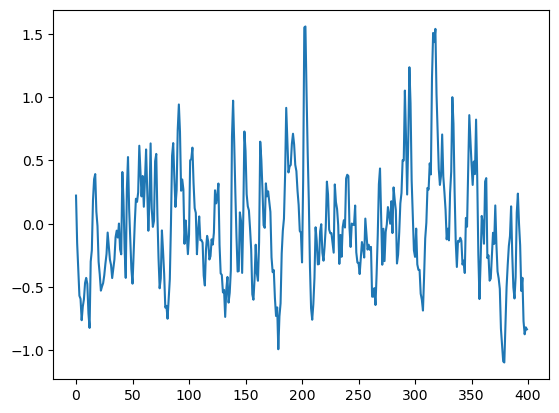

In [20]:
for session in sessions:
    if session.mouse_id == '37':
        curr_signal_info = session.signal_info.get(('DLS', 'hit'))
        signal_matrix = curr_signal_info['signal_matrix']

print(signal_matrix.shape)
plt.plot(np.mean(signal_matrix, axis=0))
plt.show()

In [21]:
#dict_keys(['33', '39', '45', '43', '55', '67', '57', '69', '51', '63'])
resp_metric_pr_brainreg = {}

all_brain_regions = ['VS', 'DMS', 'DLS']
for brainreg in ['VS', 'DMS', 'DLS']:
    _, all_resp_metrics, _ = sample_signals_and_metrics(sessions, 'hit', brainreg, weight_method='mice')
    resp_metric_pr_brainreg[brainreg] = np.asarray(all_resp_metrics[:, 4])

dict_keys(['33', '39', '45', '43', '55', '67', '57', '69', '51', '63'])
dict_keys(['23', '31', '35', '37', '45', '43', '47', '55', '67', '57', '33'])
dict_keys(['23', '25', '35', '37', '39', '47', '49', '51', '63'])


In [22]:
resp_metric_pr_brainreg['VS'] = resp_metric_pr_brainreg['VS'][resp_metric_pr_brainreg['VS'] > 60] 
resp_metric_pr_brainreg['DMS'] = resp_metric_pr_brainreg['DMS'][resp_metric_pr_brainreg['DMS'] > 0] 
resp_metric_pr_brainreg['DLS'] = resp_metric_pr_brainreg['DLS'][(resp_metric_pr_brainreg['DLS'] > 10) | (resp_metric_pr_brainreg['DLS'] < 9)] 

In [24]:
resp_metric_pr_brainreg

{'VS': array([339.02071407, 228.87324858, 162.4175759 , 208.1828455 ,
        142.47988168, 325.68941569, 334.76462737, 356.92495193]),
 'DMS': array([ 14.61610088,  51.63996439,  23.80040004,  26.90800577,
         63.59335013,  17.81537444, 139.1499762 ,  54.62525592,
         50.88661695,  32.48418355]),
 'DLS': array([ 3.77951481, 54.7571484 , 26.81121883, 35.1677912 , 16.98400036,
        21.13029179, 53.4923599 , 20.03167737])}

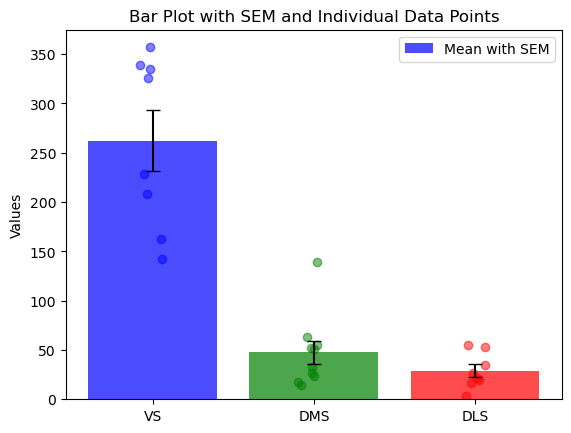

In [25]:
colors = ['blue', 'green', 'red']  # Custom colors for each bar
groups = list(resp_metric_pr_brainreg.keys())
means = []
sems = []

# Calculating mean and SEM for each group
for key in groups:
    group_data = resp_metric_pr_brainreg[key]
    mean = np.mean(group_data)
    sem = np.std(group_data, ddof=1) / np.sqrt(len(group_data))
    means.append(mean)
    sems.append(sem)

# Creating the bar plot
x_positions = np.arange(len(groups))  # Position of bars on x-axis
plt.bar(x_positions, means, color=colors, yerr=sems, capsize=5, alpha=0.7, label='Mean with SEM')

# Adding scatter plot of individual data points
for i, key in enumerate(groups):
    x_values = np.random.normal(i, 0.04, size=len(resp_metric_pr_brainreg[key]))  # Jitter x-values for visibility
    plt.scatter(x_values, resp_metric_pr_brainreg[key], color=colors[i], alpha=0.5)

# Adding labels and legend
plt.xticks(x_positions, groups)
plt.ylabel('Values')
plt.title('Bar Plot with SEM and Individual Data Points')
plt.legend()

plt.show()